# Naive Bayes

Naive Bayes é algoritmo supervisionado paramétrico probabilístico de classificação que  tem como base o teorema de Bayes   e assume independência entre as variáveis (Naive), ou seja, não enxerga correlação entre as mesmas.  

- Paramétrico supervisionado multiclasse
- Aplica o teorema de Bayes para se determinar a probabilidade condicional $P(C_{k}|X)$
- Assume independencia entre os features $P(X_{i},X_{j}|C_{k}) =P(X_{i}|C_{k})P(X_{j}|C_{k}) $
- Os parâmetros são determinados via Máxima Verossimilhança

Teorema de Bayes - Probabilidde Condicional
- P(A|B) = P(B|A) x P(A) / P(B)
- Posterior Probability = (Likelihood) x (Prior Probability) / (Marginal Likelihood)

In [1]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\fabio\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
dataset=pd.read_csv(r"../Data/Social_Network_Ads.csv")

In [55]:
dataset.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
120,15811613,Female,36,75000,0
263,15767681,Female,35,72000,0
364,15654456,Male,42,104000,1
37,15689425,Male,30,49000,0
348,15579212,Male,39,77000,0


In [3]:
X=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values

# X_col = dataset.columns[2:4]

# # Splitting training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

# # Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [51]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB(var_smoothing=1)
classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

In [52]:
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))

Training set score:0.787
Test set score:0.870


No Teste
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        68
           1       0.95      0.62      0.75        32

    accuracy                           0.87       100
   macro avg       0.90      0.81      0.83       100
weighted avg       0.88      0.87      0.86       100



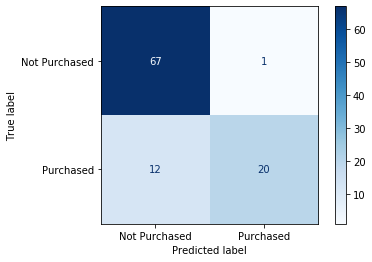

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

class_names= ['Not Purchased', 'Purchased']

print('No Teste')
print(classification_report(y_test, y_pred_test))

# print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 values_format = '.0f');

No Treino
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       189
           1       0.91      0.47      0.62       111

    accuracy                           0.79       300
   macro avg       0.83      0.72      0.74       300
weighted avg       0.81      0.79      0.77       300



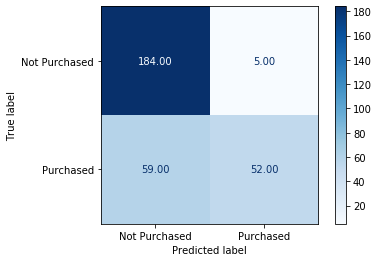

In [54]:
print('No Treino')
print(classification_report(y_train, y_pred_train))

# print(confusion_matrix(y_train, y_pred_train))

plot_confusion_matrix(classifier, X_train, y_train,
                      display_labels=class_names,
                      cmap=plt.cm.Blues,
                      normalize=None,
                      values_format = '.2f');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


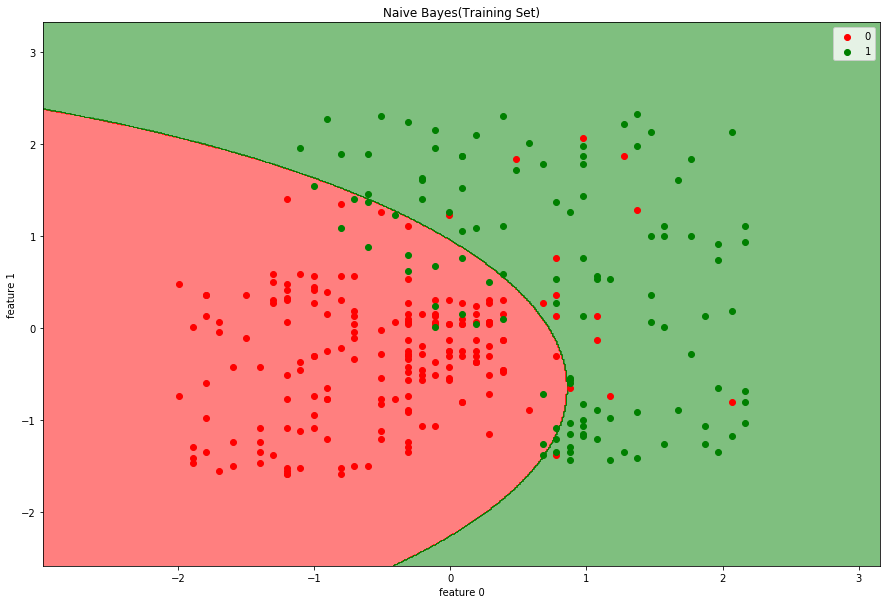

In [27]:
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_train[:,0].min() -1, stop= X_train[:,0].max() +1, step = 0.01),
                     np.arange(start= X_train[:,1].min() -1, stop= X_train[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train== j,0], X_train[y_train==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Naive Bayes(Training Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


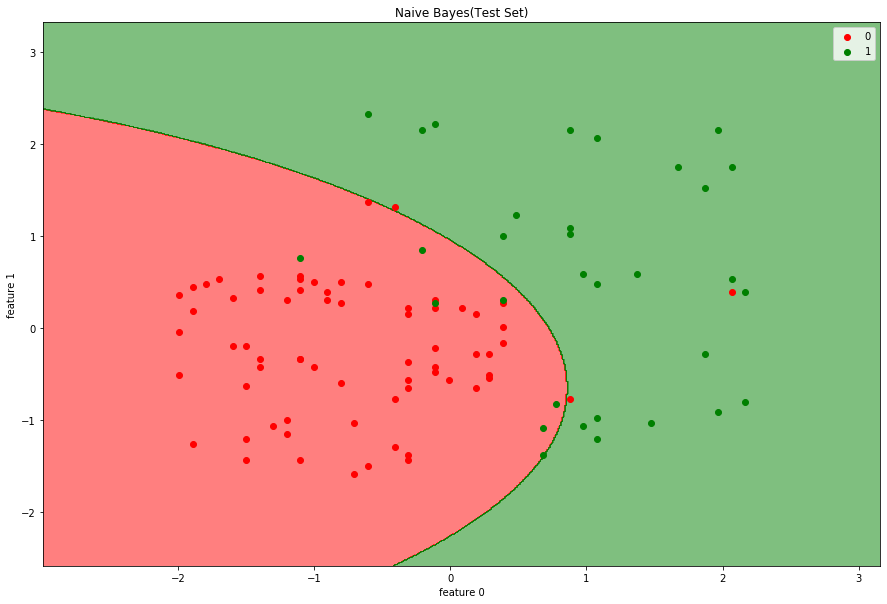

In [28]:
figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test== j,0], X_test[y_test==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Naive Bayes(Test Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

In [33]:
print('number of training samples observed in each class',classifier.class_count_)
print('\n')
print('probability of each class',classifier.class_prior_)
print('\n')
print('class labels known to the classifier',classifier.classes_)
print('\n')
print('absolute additive value to variances',classifier.epsilon_)
print('\n')
print('variance of each feature per class',classifier.sigma_)
print('\n')
print('mean of each feature per class',classifier.theta_)


number of training samples observed in each class [189. 111.]


probability of each class [0.63 0.37]


class labels known to the classifier [0 1]


absolute additive value to variances 1.0000000000000007e-09


variance of each feature per class [[0.60054618 0.50695834]
 [0.71735215 1.49744425]]


mean of each feature per class [[-0.45740326 -0.27263527]
 [ 0.77882176  0.4642168 ]]


In [50]:
print('média e variancia para a classe 0 para feature 0:')
print(X_train[y_train==1][:,0].mean())
print(X_train[y_train==1][:,0].var())

média e variancia para a classe 0:
0.7788217616615897
0.7173521523696471


# Multinomial Naive Bayes

In [60]:
dataset['Age_Category'] = dataset['Age'].apply(lambda x:'kid' if x<=10 
                                               else 'teenager' if x<=18
                                               else 'young adult' if x<=25
                                               else 'adult' if x<=45
                                               else 'mature' if x<=60
                                               else 'old')

In [65]:
dataset[['Gender','Age_Category', 'Purchased']].sample(5)

,Gender,Age_Category,Purchased
60,Male,adult,0
136,Female,young adult,0
118,Male,adult,0
268,Female,mature,1
21,Female,mature,1


In [72]:
# # Splitting training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(dataset[['Gender','Age_Category']]),
                                                    dataset[['Purchased']],
                                                    test_size=0.25, 
                                                    random_state=0)


In [73]:
from sklearn.naive_bayes import MultinomialNB

classifier=MultinomialNB(alpha=1)
classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
y_pred_test = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))

Training set score:0.810
Test set score:0.870


No Teste
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        68
           1       0.91      0.66      0.76        32

    accuracy                           0.87       100
   macro avg       0.89      0.81      0.84       100
weighted avg       0.88      0.87      0.86       100



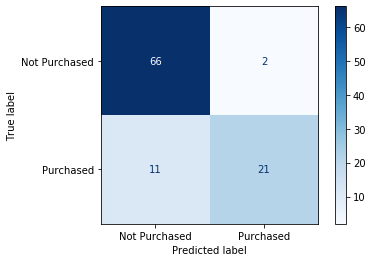

In [77]:
print('No Teste')
print(classification_report(y_test, y_pred_test))

# print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 values_format = '.0f');

No Treino
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       189
           1       0.84      0.60      0.70       111

    accuracy                           0.81       300
   macro avg       0.82      0.77      0.78       300
weighted avg       0.81      0.81      0.80       300



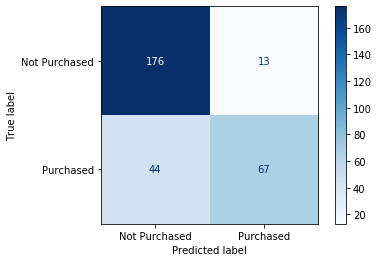

In [78]:
print('No Treino')
print(classification_report(y_train, y_pred_train))

# print(confusion_matrix(y_train, y_pred_train))

plot_confusion_matrix(classifier, X_train, y_train,
                      display_labels=class_names,
                      cmap=plt.cm.Blues,
                      normalize=None,
                      values_format = '.0f');
